In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use(['fivethirtyeight'])

# Load data

In [144]:
pop_const = 314
video_df = pd.read_csv('videodata.txt', delim_whitespace=True)

# Scenario 1 (point estimate, interval estimate [gamer/non gamer])

In [145]:
v_df_nongamer = video_df[video_df['time'] == 0.0]
v_df_gamer = video_df[video_df['time'] != 0.0]

xbar = len(v_df_gamer) / len(video_df)

stderr = np.sqrt(xbar * (1 - xbar)) / np.sqrt(len(video_df) - 1)
stderr *= np.sqrt(pop_const - len(video_df)) / np.sqrt(pop_const)
ie_gamer = (xbar - (1.96 * stderr), xbar + (1.96 * stderr))

In [171]:
print("point estimate:", xbar)
print("interval estimate:", ie_gamer)

point estimate: 0.37362637362637363
interval estimate: (0.28939809634670244, 0.4578546509060448)


In [62]:
video_daily_df = video_df[video_df['freq'] == 1]
mean_vid_daily = np.mean(video_daily_df['time'])
std_vid_daily = np.std(video_daily_df['time'])

video_weekly_df = video_df[video_df['freq'] == 2]
mean_vid_weekly = np.mean(video_weekly_df['time'])
std_vid_weekly = np.std(video_weekly_df['time'])

video_monthly_df = video_df[video_df['freq'] == 3]
mean_vid_monthly = np.mean(video_monthly_df['time'])
std_vid_monthly = np.std(video_monthly_df['time'])

video_semesterly_df = video_df[video_df['freq'] == 4]
mean_vid_semesterly = np.mean(video_semesterly_df['time'])
std_vid_semesterly = np.std(video_semesterly_df['time'])

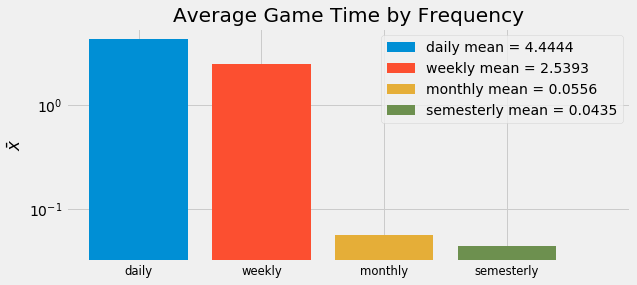

In [212]:
plt.figure(figsize=(9,4))

means = [mean_vid_daily, mean_vid_weekly, mean_vid_monthly, mean_vid_semesterly]
labels = ['daily', 'weekly', 'monthly', 'semesterly']

for i in range(4):
    plt.bar([i], 
            height=[means[i]], 
            label='{} mean = {:.4f}'.format(labels[i], means[i]), 
            log=True,)
            #yerr=[std_vid_daily, std_vid_weekly, std_vid_monthly, std_vid_semesterly])
    
plt.xticks(x, labels, size='small')
plt.ylabel(r'$\bar{x}$')
plt.title('Average Game Time by Frequency')
plt.legend()
plt.show()

# Scenario 3 (normality assumption incoming)

In [174]:
xbar_time = np.mean(video_df['time'])
std_time = np.std(video_df['time'])
err_time = xbar_time / np.sqrt(len(video_df['time']))
ie_time = (xbar_time - err_time, xbar_time + err_time)

print("point estimate:", xbar_time)
print("interval estimate:", ie_time)

point estimate: 1.2428571428571429
interval estimate: (1.1125703131502758, 1.37314397256401)


# Scenario 4

In [182]:
num_np = len(video_df[video_df['like'] == 1])
num_vm = len(video_df[video_df['like'] == 2])
num_some = len(video_df[video_df['like'] == 3])
num_nr = len(video_df[video_df['like'] == 4])
num_naa = len(video_df[video_df['like'] == 5])

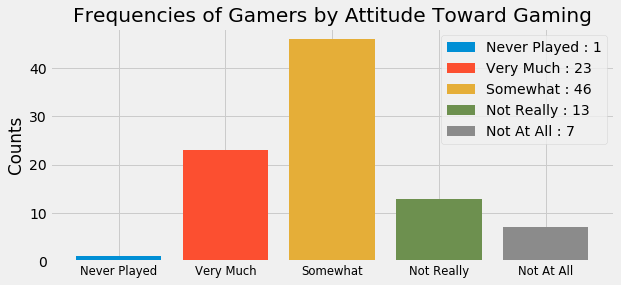

In [189]:
plt.figure(figsize=(9,4))

counts = [num_np, num_vm, num_some, num_nr, num_naa]
labels = ['Never Played', 'Very Much', 'Somewhat', 'Not Really', 'Not At All']

for i in range(5):
    plt.bar([i], 
            height=[counts[i]], 
            label='{} : {}'.format(labels[i], counts[i]), 
            log=False,)
    
plt.xticks(x, labels, size='small')
plt.ylabel('Counts')
plt.title('Frequencies of Gamers by Attitude Toward Gaming')
plt.legend()
plt.show()

# Scenario 5

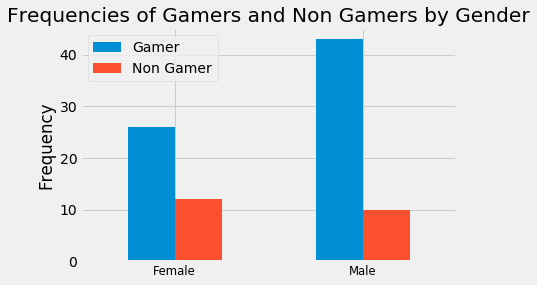

In [271]:
def isgamer(row):
    isg = int((row['like'] == 2) | (row['like'] == 3))
    
    if isg:
        return 'Gamer'
    return 'Non Gamer'

video_df['isgamer'] = video_df.apply(lambda row: isgamer(row), axis=1)

video_df[['isgamer', 'sex']].pivot_table(index='sex',
               columns='isgamer',
               aggfunc=len,
               fill_value=0).plot(kind='bar')

plt.xticks([0, 1], ['Female', 'Male'], size='small', rotation=0)
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Frequencies of Gamers and Non Gamers by Gender')
plt.legend()

plt.show()

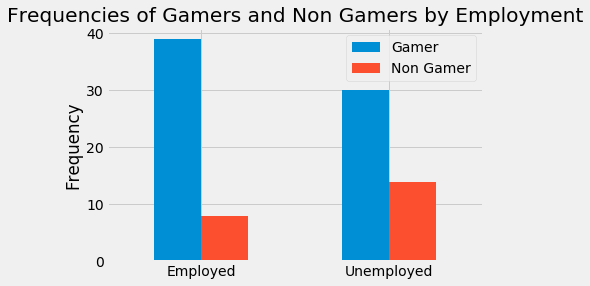

In [272]:
def isemployed(row):
    ise = row['work'] != 0
    
    if ise:
        return 'Employed'
    return 'Unemployed'

video_df['employed'] = video_df.apply(lambda row: isemployed(row), axis=1)

video_df[['isgamer', 'employed']].pivot_table(index='employed',
               columns='isgamer',
               aggfunc=len,
               fill_value=0).plot(kind='bar')

plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Frequencies of Gamers and Non Gamers by Employment')
plt.legend()

plt.show()